<a href="https://colab.research.google.com/github/Sateasinpedas/Supermarket-sales-analysis-python/blob/main/Rafli_Ardiansyah_DS_Essay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengimport library yang dibutuhkan dan data 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
#set tema seaborn
sns.set_theme(style='whitegrid')

df = pd.read_csv('/content/supermarket_sales.csv')

Melihat informasi dari data

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Dari gambar diatas, kita bisa mengetahui bahwa data kita memiliki 1000 baris dan 16 kolom. Kita dapat mengetahui tipe data dari tiap tiap kolom.

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.describe().T #check outliners data

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


# Data Cleaning


In [8]:
 #Menghapus Kolom Atau Fitur Yang tidak Berguna Untuk Analisa Data
df = df.drop(['Invoice ID', 'Branch'], axis = 1)
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Merubah tipe data date dan time lalu mengeceknya

In [9]:
# mengganti tipe data date and time
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

df.dtypes

City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [10]:
#Menambahkan tabel baru
df['month'] = df['Date'].dt.month_name()
df["day"]=df["Date"].dt.day_name()
df["weekday"]=df.Date.dt.weekday
df

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-01-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-01-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,Friday,4
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-01-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,6
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-01-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,6
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-01-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2023-01-24 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,January,Tuesday,1
996,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2023-01-24 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,March,Saturday,5
997,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2023-01-24 13:22:00,Cash,31.84,4.761905,1.5920,7.7,February,Saturday,5
998,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2023-01-24 15:33:00,Cash,65.82,4.761905,3.2910,4.1,February,Friday,4


# Check Korelasi

In [11]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,weekday
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,-0.007040
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,0.054770
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,0.038809
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.013879
weekday,-0.007040,0.054770,0.038809,0.038809,0.038809,NaN,0.038809,-0.013879,1.000000


Kita bisa lihat ada relasi yang kuat antara Tax 5%, otal, cogs dan gross income

In [12]:
for i in df.columns:
  print(i,'=',df[i].unique())

City = ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type = ['Member' 'Normal']
Gender = ['Female' 'Male']
Product line = ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Unit price = [74.69 15.28 46.33 58.22 86.31 85.39 68.84 73.56 36.26 54.84 14.48 25.51
 46.95 43.19 71.38 93.72 68.93 72.61 54.67 40.3  86.04 87.98 33.2  34.56
 88.63 52.59 33.52 87.67 88.36 24.89 94.13 78.07 83.78 96.58 99.42 68.12
 62.62 60.88 54.92 30.12 86.72 56.11 69.12 98.7  15.37 93.96 56.69 20.01
 18.93 82.63 91.4  44.59 17.87 15.43 16.16 85.98 44.34 89.6  72.35 30.61
 24.74 55.73 55.07 15.81 75.74 15.87 33.47 97.61 78.77 18.33 89.48 62.12
 48.52 75.91 74.67 41.65 49.04 78.31 20.38 99.19 96.68 19.25 80.36 48.91
 83.06 76.52 49.38 42.47 76.99 47.38 44.86 21.98 64.36 89.75 97.16 87.87
 12.45 52.75 82.7  48.71 78.55 23.07 58.26 30.35 88.67 27.38 62.13 33.98
 81.97 16.49 98.21 72.84 58.07 80.79 27.02 21.94 51.36 10.96 53.44 99.56
 57.12

# Insight

In [13]:
df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month,day,weekday
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-01-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-01-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March,Friday,4
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-01-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,6
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-01-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,6
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-01-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,4


Jumlah customer berdasarkan tipe customer

In [29]:
# Tipe customer 
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Customer dari supermaket ternyata 50% adalah member dan 50% sisanya adalah normal

In [37]:
df["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [32]:
print("Jumlah customer Member berdasarkan produk")
df[df["Customer type"]=="Member"]['Product line'].value_counts().sort_values(ascending=False)

Jumlah customer Member berdasarkan produk


Food and beverages        94
Sports and travel         87
Fashion accessories       86
Home and lifestyle        83
Electronic accessories    78
Health and beauty         73
Name: Product line, dtype: int64

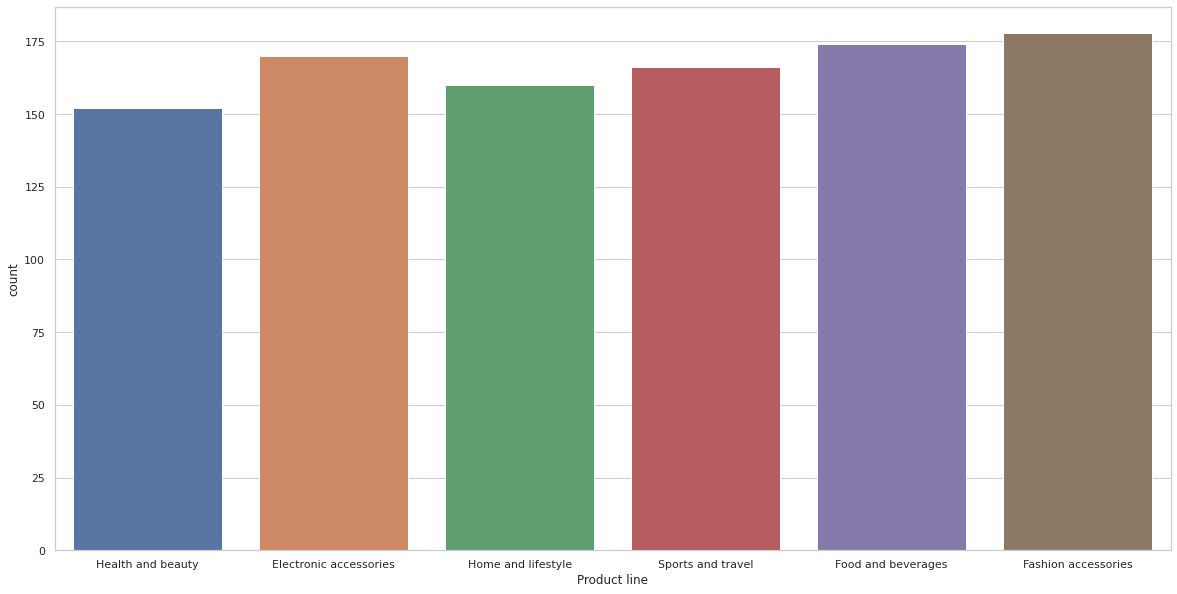

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="Product line")

Kategori "Fashion accessories" adalah produk yang paling diminati

In [33]:
print("Jumlah customer normal berdasarkan produk")
df[df["Customer type"]=="Normal"]['Product line'].value_counts().sort_values(ascending=False)

Jumlah customer normal berdasarkan produk


Electronic accessories    92
Fashion accessories       92
Food and beverages        80
Sports and travel         79
Health and beauty         79
Home and lifestyle        77
Name: Product line, dtype: int64

Kategori "Food and beverage" menjadi produk yang paling diminati oleh member, sedangkan customer normal paling banyak diminati adalah katogeri "Electornic accessories"

In [17]:
# Kategori produk yang diminati berdasarkan gender

df.groupby("Gender")["Product line"].value_counts().sort_values(ascending = False)

Gender  Product line          
Female  Fashion accessories       96
        Food and beverages        90
        Sports and travel         88
Male    Health and beauty         88
        Electronic accessories    86
Female  Electronic accessories    84
Male    Food and beverages        84
        Fashion accessories       82
        Home and lifestyle        81
Female  Home and lifestyle        79
Male    Sports and travel         78
Female  Health and beauty         64
Name: Product line, dtype: int64

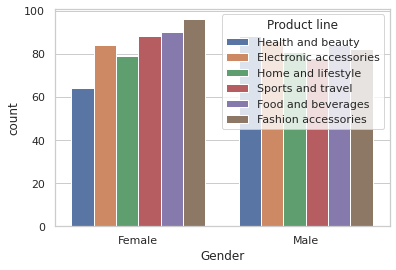

In [26]:

#visualisasi data 
sns.countplot(data=df, x="Gender", hue="Product line")

In [34]:
print("Total gross income = ", df["gross income"].sum())

Total gross income =  15379.368999999999


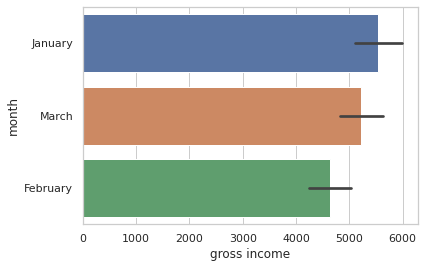

In [35]:
sns.barplot(x="gross income", y = "month", data=df, estimator=sum)

Bulan januari memiliki pendapatan yang paling besar selama beberapa bulan terakhir.

In [48]:
# Kategori pendapatan terbesar berdasarkan kota

df.groupby("City")["gross income"].agg(["max","min","mean","sum"])

,max,min,mean,sum
City,,,,
Mandalay,48.69,0.8875,15.232024,5057.0320
Naypyitaw,49.65,0.5085,16.052367,5265.1765
Yangon,49.49,0.6045,14.874001,5057.1605


Text(0.5, 1.0, 'Total Gross Income')

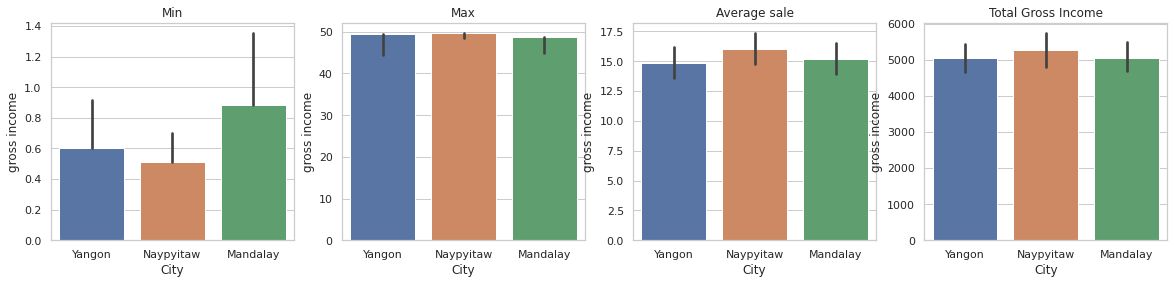

In [55]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
sns.barplot(data=df, x="City", y="gross income",estimator=min)
plt.title("Min")
plt.subplot(1,4,2)
sns.barplot(data=df, x="City", y="gross income",estimator=max)
plt.title("Max")
plt.subplot(1,4,3)
sns.barplot(data=df, x="City", y="gross income")
plt.title("Average sale")
plt.subplot(1,4,4)
sns.barplot(data=df, x="City", y="gross income",estimator=sum)
plt.title("Total Gross Income")

Gross income terbesar didapatkan di kota Naypyitaw city

In [57]:
# Menampilkan pendapatan tertinggi yang didapatkan di kota Naypyitaw 
df_Naypyitaw = df[df["City"]=="Naypyitaw"]
df_Naypyitaw[df_Naypyitaw["gross income"]==df_Naypyitaw["gross income"].max()][["City","Product line","Customer type", "month", "Date"]]

,City,Product line,Customer type,month,Date
350,Naypyitaw,Fashion accessories,Member,February,2019-02-15


In [58]:
# Menampilkan pendapatan tertinggi yang didapatkan di kota Mandalay
df_Mandalay = df[df["City"]=="Mandalay"]
df_Mandalay[df_Mandalay["gross income"]==df_Mandalay["gross income"].max()][["City","Product line","Customer type", "month", "Date"]]

,City,Product line,Customer type,month,Date
996,Mandalay,Home and lifestyle,Normal,March,2019-03-02


In [59]:
# Menampilkan pendapatan tertinggi yang didapatkan di kota Yangon
df_Yangon = df[df["City"]=="Yangon"]
df_Yangon[df_Yangon["gross income"]==df_Yangon["gross income"].max()][["City","Product line","Customer type", "month", "Date"]]

,City,Product line,Customer type,month,Date
167,Yangon,Fashion accessories,Normal,February,2019-02-08


In [61]:
## Total grass income setiap bulan berdasarkan kota

df.groupby(["City","month"])["gross income"].sum().sort_values(ascending=False)

City       month   
Naypyitaw  January     1925.4610
Yangon     January     1841.9585
           March       1793.2915
Naypyitaw  March       1771.3830
Mandalay   January     1770.2885
           March       1647.4925
           February    1639.2510
Naypyitaw  February    1568.3325
Yangon     February    1421.9105
Name: gross income, dtype: float64

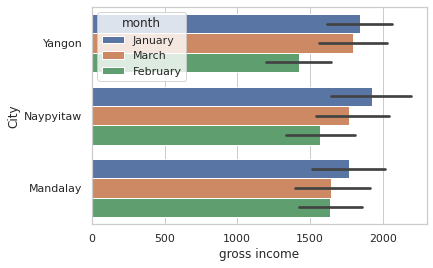

In [64]:
sns.barplot(data=df, x="gross income", y="City", hue="month", estimator=sum)

In [67]:
# Total gross income berdasarkan weekday atau weekend

week_df = df[df["weekday"]<5]
weekend_df = df[df["weekday"]>=5]
print("Weekdays sale = ", week_df["gross income"].sum())
print("Weekend sale = ", weekend_df["gross income"].sum())

Weekdays sale =  10589.907000000001
Weekend sale =  4789.4619999999995


In [68]:
week_df.groupby("City")["gross income"].sum().sort_values(ascending=False)

City
Naypyitaw    3593.428
Mandalay     3547.520
Yangon       3448.959
Name: gross income, dtype: float64

In [69]:
weekend_df.groupby("City")["gross income"].sum().sort_values(ascending=False)

City
Naypyitaw    1671.7485
Yangon       1608.2015
Mandalay     1509.5120
Name: gross income, dtype: float64

Gross income lebih banyak dihasilkan pada saat weekday.